Group 25 Project

Doris (33996984)

Verness Chin (52924784)

Mackenzie Dy (62709126)

Kunyue Liu (94258175)


# Title: Heart Failure

## Introduction
Around 17 million people in the world die of cardiovascular diseases every year from myocardial infractions and heart failures (Chicco & Jurman, 2020). Cardiovascular diseases refer to the failure of the heart and blood vessels, such as heart attacks, stroke, and heart failure (Chicco & Jurman, 2020). Of all the cardiovascular diseases, heart failure is one of the more common ones. Heart failure refers to a condition in which the heart cannot pump enough blood for the body. According to research, patients who experience heart failure bear higher risks of mortality compared to patients without heart failure (Chicco & Jurman, 2020). **In this analysis, we are going to explore which specific variables can be used to predict the death event for patients with heart failure.**

The dataset we selected includes medical records of 299 patients with heart failure. The dataset has 11 columns, of which, except for the age of patients, all the variables can be classified as quantitative or categorical. Of all the variables, we select several quantitative features as potential predictors based on background research. 

**Based on the dataset we have, we have selected creatinine phosphokinase, ejection fraction, platelets, serum creatinine, and serum sodium as potential predictors for several reasons.** First of all, these factors have been researched and proven to have a dramatic influence on a patient with heart failure. It is common practice that, when recommending treatments in medical practices, heart failure can be determined according to ejection fraction. Hence, ejection fraction is one of the key variables when we consider heart failure (Bozkurt, 2021). In addition, other conditions are also seen as symptoms of heart failure and thus contribute to mortality. For example, high creatinine phosphokinase caused by damaged muscle tissue always indicates heart failure or injury (Chicco & Jurman, 2020). Another one is the abnormal ease of bleeding which is caused by low platelets. Serum sodium is tested to be an important feature with respect to heart failure (Chicco & Jurman, 2020). Secondly, research shows that heart failure will increase end-stage renal disease (ESRD) and rates of mortality for patients with chronic kidney disease (CKD) (Sud et al., 2015). Even minimal changes in serum creatinine of patients with heart failure after surgeries will cause differences in mortality (Lassnigg et al., 2004). In other words, heart failure is not something to be taken lightly and has drastic consequences. Thirdly, the research shows that older patients with HF also bear additional death risks caused by non-cardiovascular diseases. So, there's a positive correlation between the age of patients with HF and mortality (Lee et al., 2011).

The question we will attempt to answer is as follows: between creatinine phosphokinase, ejection fraction, platelets, serum creatinine, and serum sodium, which pair affects the death event the most?

We are going to incorporate the methodology of K-nearest neighbors to answer the question. After comparing different combinations of selected features, we will choose the most optimistic one to build a classification model and conduct the prediction.

## Methods and Results

In [ ]:
import altair as alt
import numpy as np
import pandas as pd
from sklearn import set_config
from sklearn.compose import make_column_transformer
from sklearn.model_selection import (
    GridSearchCV,
    train_test_split,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Simplify working with large datasets in Altair
alt.data_transformers.disable_max_rows()

# Output dataframes instead of arrays
set_config(transform_output="pandas")

: 

Below, we read the data from the original source on the web.

In [87]:
url = 'https://archive.ics.uci.edu/static/public/519/data.csv'
data = pd.read_csv(url)
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In this analysis, we will be focusing on quantitative variables rather than the boolean variables as that is the subject of our attention.

We've also converted the death event to a more readable format (yes and no).

In [88]:
data["death_event"] = data["death_event"].astype(str).replace({
    '1': 'Yes',
    '0': 'No'
})
data[['age','creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'death_event']]

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,death_event
0,75.0,582,20,265000.00,1.9,130,Yes
1,55.0,7861,38,263358.03,1.1,136,Yes
2,65.0,146,20,162000.00,1.3,129,Yes
3,50.0,111,20,210000.00,1.9,137,Yes
4,65.0,160,20,327000.00,2.7,116,Yes
...,...,...,...,...,...,...,...
294,62.0,61,38,155000.00,1.1,143,No
295,55.0,1820,38,270000.00,1.2,139,No
296,45.0,2060,60,742000.00,0.8,138,No
297,45.0,2413,38,140000.00,1.4,140,No


This is where we split the data into the test (25%) and training data (75%).

In [89]:
heart_disease_train, heart_disease_test = train_test_split(data, test_size=0.25, random_state=123)

For our preferred analysis, we want two variables that will help us accurately predict a death event. However, we cannot randomly select a pair of variables, as there could exist another pair of variables that might predict the death event more accurately. To solve this, we will compare all possible pairs and determine which one has the higher accuracy.

Below, we initialize a dataframe to store all the possible pairs and their accuracies.

In [90]:
compared_categories_dataframe = pd.DataFrame(columns=['category_1', 'category_2', 'prediction_accuracy', 'optimal_k'])

### Comparison of Ejection Fraction and Serum Creatinine

In order to find the best value of <i>K</i> for the KNeighborsClassifier, we first initialize the preprocessor (to standardize the values) and the parameter grid (with a range of 1 to 49).

In [91]:
compared_categories = ['ejection_fraction', 'serum_creatinine']

heart_disease_preprocessor = make_column_transformer(
     (StandardScaler(), compared_categories),
     remainder= 'passthrough',
     verbose_feature_names_out=False,
)

parameter_grid = {
    "kneighborsclassifier__n_neighbors": range(1, 50, 1),
}

In optimizing our model, we devised a sophisticated pipeline that integrates preprocessing and classification components. Employing the GridSearchCV methodology, we fine-tuned our model's hyperparameters with a choice of 5 folds for cross-validation on the training set. Through this process, we computed mean test scores for varying values of the hyperparameter <i>K</i>. Our objective was to pinpoint the <i>K</i> that maximized the test score, thereby ensuring optimal predictive performance. 

In [133]:
heart_disease_pipeline = make_pipeline(heart_disease_preprocessor, KNeighborsClassifier())

heart_disease_tune_grid = GridSearchCV(
    estimator=heart_disease_pipeline,
    param_grid=parameter_grid,
    cv=5
)

accuracies_grid = pd.DataFrame(
    heart_disease_tune_grid.fit(
        heart_disease_train[compared_categories],
        heart_disease_train["death_event"]
    ).cv_results_
)

# makes the accuracies_grid easier to read
accuracies_grid = (
    accuracies_grid[[
        "param_kneighborsclassifier__n_neighbors",
        "mean_test_score",
        "std_test_score"
    ]]
    .assign(sem_test_score=accuracies_grid["std_test_score"] / 5**(1/2))
    .rename(columns={"param_kneighborsclassifier__n_neighbors": "n_neighbors"})
    .drop(columns=["std_test_score"])
)

# filters out the highest test score and returns the row
accuracies_grid.loc[accuracies_grid['mean_test_score'].idxmax()]

n_neighbors               7
mean_test_score    0.741212
sem_test_score     0.026856
Name: 6, dtype: object

Here is a plot that visually shows the <i>K</i> value and its mean test score.

In [124]:
cross_val_plot = alt.Chart(accuracies_grid).mark_line(point=True).encode(
    x=alt.X("n_neighbors:O", title="Number of Neighbors (k)", scale=alt.Scale(zero=False)),
    y=alt.Y("mean_test_score:Q", title="Accuracy", scale=alt.Scale(zero=False))
).properties(width=400, height=300)

cross_val_plot

alt.Chart(...)

As we can see above, the best <i>K</i> value is 8 with a mean test score of 0.79. We will use this <i>K</i> value to train a model on the tranining data, predict test values, and score the accuracy of the classifier.

In [125]:
n = 8
X = heart_disease_train[compared_categories]
y = heart_disease_train["death_event"]

heart_disease_fit = make_pipeline(heart_disease_preprocessor, KNeighborsClassifier(n_neighbors = n))
heart_disease_fit = heart_disease_fit.fit(X, y)

heart_disease_test_predictions = heart_disease_test.assign(
    predicted = heart_disease_fit.predict(heart_disease_test[compared_categories])
)

X_test = heart_disease_test_predictions[compared_categories]
y_test = heart_disease_test_predictions["death_event"]
heart_disease_prediction_accuracy = heart_disease_fit.score(X_test, y_test)
heart_disease_prediction_accuracy

0.7066666666666667

Now that we have our accuracy score, we store it in a database for further analysis. This accuracy score is an indicator of how well the model trained on the training data predicts the test data. It's computed by taking the number of correct predictions and dividing it by the number of predictions.

In [13]:
new_row = {"category_1" : "ejection_fraction", "category_2" : "serum_creatinine", "prediction_accuracy" : heart_disease_prediction_accuracy, "optimal_k" : n }
compared_categories_dataframe.loc[len(compared_categories_dataframe)] = new_row
compared_categories_dataframe

,category_1,category_2,prediction_accuracy,optimal_k
0,ejection_fraction,serum_creatinine,0.626667,8


We will now repeat this process for all possible pairs.

### Comparsion of Ejection Fraction and Platelets

In [14]:
# the pair of variables we are now comparing
compared_categories = ['ejection_fraction', 'platelets']

heart_disease_preprocessor = make_column_transformer(
     (StandardScaler(), compared_categories),
     remainder= 'passthrough',
     verbose_feature_names_out=False,
)

parameter_grid = {
    "kneighborsclassifier__n_neighbors": range(1, 50, 1),
}

heart_disease_pipeline = make_pipeline(heart_disease_preprocessor, KNeighborsClassifier())

heart_disease_tune_grid = GridSearchCV(
    estimator=heart_disease_pipeline,
    param_grid=parameter_grid,
    cv=5
)

accuracies_grid = pd.DataFrame(
    heart_disease_tune_grid.fit(
        heart_disease_train[compared_categories],
        heart_disease_train["death_event"]
    ).cv_results_
)

# makes the accuracies_grid easier to read
accuracies_grid = (
    accuracies_grid[[
        "param_kneighborsclassifier__n_neighbors",
        "mean_test_score",
        "std_test_score"
    ]]
    .assign(sem_test_score=accuracies_grid["std_test_score"] / 5**(1/2))
    .rename(columns={"param_kneighborsclassifier__n_neighbors": "n_neighbors"})
    .drop(columns=["std_test_score"])
)

# filters out the highest test score and returns the row
accuracies_grid.loc[accuracies_grid['mean_test_score'].idxmax()]

n_neighbors              15
mean_test_score    0.776869
sem_test_score     0.015153
Name: 14, dtype: object

Through cross-validation we find that the optimal <i>K</i> value for Ejection Fraction and Platelets is <i>K = 15</i>. Below, we use that number to predict the death event and score the model.

In [15]:
n = 15
X = heart_disease_train[compared_categories]
y = heart_disease_train["death_event"]

heart_disease_fit = make_pipeline(heart_disease_preprocessor, KNeighborsClassifier(n_neighbors = n))
heart_disease_fit = heart_disease_fit.fit(X, y)

heart_disease_test_predictions = heart_disease_test.assign(
    predicted = heart_disease_fit.predict(heart_disease_test[compared_categories])
)

X_test = heart_disease_test_predictions[compared_categories]
y_test = heart_disease_test_predictions["death_event"]
heart_disease_prediction_accuracy = heart_disease_fit.score(X_test, y_test)
heart_disease_prediction_accuracy

0.5733333333333334

In [16]:
new_row = {'category_1' : 'ejection_fraction', 'category_2' : 'platelets', 'prediction_accuracy' : heart_disease_prediction_accuracy, "optimal_k" : n }
compared_categories_dataframe.loc[len(compared_categories_dataframe)] = new_row
compared_categories_dataframe

,category_1,category_2,prediction_accuracy,optimal_k
0,ejection_fraction,serum_creatinine,0.626667,8
1,ejection_fraction,platelets,0.573333,15


### Comparison of Ejection Fraction and Serum Sodium

In [17]:
# the pair of variables we are now comparing
compared_categories = ['ejection_fraction', 'serum_sodium']

heart_disease_preprocessor = make_column_transformer(
     (StandardScaler(), compared_categories),
     remainder= 'passthrough',
     verbose_feature_names_out=False,
)

parameter_grid = {
    "kneighborsclassifier__n_neighbors": range(1, 50, 1),
}

heart_disease_pipeline = make_pipeline(heart_disease_preprocessor, KNeighborsClassifier())

heart_disease_tune_grid = GridSearchCV(
    estimator=heart_disease_pipeline,
    param_grid=parameter_grid,
    cv=5
)

accuracies_grid = pd.DataFrame(
    heart_disease_tune_grid.fit(
        heart_disease_train[compared_categories],
        heart_disease_train["death_event"]
    ).cv_results_
)

# makes the accuracies_grid easier to read
accuracies_grid = (
    accuracies_grid[[
        "param_kneighborsclassifier__n_neighbors",
        "mean_test_score",
        "std_test_score"
    ]]
    .assign(sem_test_score=accuracies_grid["std_test_score"] / 5**(1/2))
    .rename(columns={"param_kneighborsclassifier__n_neighbors": "n_neighbors"})
    .drop(columns=["std_test_score"])
)

# filters out the highest test score and returns the row
accuracies_grid.loc[accuracies_grid['mean_test_score'].idxmax()]

n_neighbors              21
mean_test_score    0.772323
sem_test_score     0.009687
Name: 20, dtype: object

In [18]:
n = 21
X = heart_disease_train[compared_categories]
y = heart_disease_train["death_event"]

heart_disease_fit = make_pipeline(heart_disease_preprocessor, KNeighborsClassifier(n_neighbors = n))
heart_disease_fit = heart_disease_fit.fit(X, y)

heart_disease_test_predictions = heart_disease_test.assign(
    predicted = heart_disease_fit.predict(heart_disease_test[compared_categories])
)

X_test = heart_disease_test_predictions[compared_categories]
y_test = heart_disease_test_predictions["death_event"]
heart_disease_prediction_accuracy = heart_disease_fit.score(X_test, y_test)
heart_disease_prediction_accuracy

0.6

In [19]:
new_row = {'category_1' : 'ejection_fraction', 'category_2' : 'serum_sodium', 'prediction_accuracy' : heart_disease_prediction_accuracy, "optimal_k" : n }
compared_categories_dataframe.loc[len(compared_categories_dataframe)] = new_row
compared_categories_dataframe

,category_1,category_2,prediction_accuracy,optimal_k
0,ejection_fraction,serum_creatinine,0.626667,8
1,ejection_fraction,platelets,0.573333,15
2,ejection_fraction,serum_sodium,0.600000,21


### Comparison of Ejection Fraction and Creatinine Phosphokinase

In [20]:
# the pair of variables we are now comparing
compared_categories = ['ejection_fraction', 'creatinine_phosphokinase']

heart_disease_preprocessor = make_column_transformer(
     (StandardScaler(), compared_categories),
     remainder= 'passthrough',
     verbose_feature_names_out=False,
)

parameter_grid = {
    "kneighborsclassifier__n_neighbors": range(1, 50, 1),
}

heart_disease_pipeline = make_pipeline(heart_disease_preprocessor, KNeighborsClassifier())

heart_disease_tune_grid = GridSearchCV(
    estimator=heart_disease_pipeline,
    param_grid=parameter_grid,
    cv=5
)

accuracies_grid = pd.DataFrame(
    heart_disease_tune_grid.fit(
        heart_disease_train[compared_categories],
        heart_disease_train["death_event"]
    ).cv_results_
)

# makes the accuracies_grid easier to read
accuracies_grid = (
    accuracies_grid[[
        "param_kneighborsclassifier__n_neighbors",
        "mean_test_score",
        "std_test_score"
    ]]
    .assign(sem_test_score=accuracies_grid["std_test_score"] / 5**(1/2))
    .rename(columns={"param_kneighborsclassifier__n_neighbors": "n_neighbors"})
    .drop(columns=["std_test_score"])
)

# filters out the highest test score and returns the row
accuracies_grid.loc[accuracies_grid['mean_test_score'].idxmax()]

n_neighbors               8
mean_test_score    0.781212
sem_test_score     0.009871
Name: 7, dtype: object

In [21]:
n = 10
X = heart_disease_train[compared_categories]
y = heart_disease_train["death_event"]

heart_disease_fit = make_pipeline(heart_disease_preprocessor, KNeighborsClassifier(n_neighbors = n))
heart_disease_fit = heart_disease_fit.fit(X, y)

heart_disease_test_predictions = heart_disease_test.assign(
    predicted = heart_disease_fit.predict(heart_disease_test[compared_categories])
)

X_test = heart_disease_test_predictions[compared_categories]
y_test = heart_disease_test_predictions["death_event"]
heart_disease_prediction_accuracy = heart_disease_fit.score(X_test, y_test)
heart_disease_prediction_accuracy

0.6133333333333333

In [22]:
new_row = {'category_1' : 'ejection_fraction', 'category_2' : 'creatinine_phosphokinase', 'prediction_accuracy' : heart_disease_prediction_accuracy, "optimal_k" : n }
compared_categories_dataframe.loc[len(compared_categories_dataframe)] = new_row
compared_categories_dataframe

,category_1,category_2,prediction_accuracy,optimal_k
0,ejection_fraction,serum_creatinine,0.626667,8
1,ejection_fraction,platelets,0.573333,15
2,ejection_fraction,serum_sodium,0.600000,21
3,ejection_fraction,creatinine_phosphokinase,0.613333,10


### Comparison of Creatinine Phosphokinase and Serum Creatinine

In [23]:
# the pair of variables we are now comparing
compared_categories = ['creatinine_phosphokinase', 'serum_creatinine']

heart_disease_preprocessor = make_column_transformer(
     (StandardScaler(), compared_categories),
     remainder= 'passthrough',
     verbose_feature_names_out=False,
)

parameter_grid = {
    "kneighborsclassifier__n_neighbors": range(1, 50, 1),
}

heart_disease_pipeline = make_pipeline(heart_disease_preprocessor, KNeighborsClassifier())

heart_disease_tune_grid = GridSearchCV(
    estimator=heart_disease_pipeline,
    param_grid=parameter_grid,
    cv=5
)

accuracies_grid = pd.DataFrame(
    heart_disease_tune_grid.fit(
        heart_disease_train[compared_categories],
        heart_disease_train["death_event"]
    ).cv_results_
)

# makes the accuracies_grid easier to read
accuracies_grid = (
    accuracies_grid[[
        "param_kneighborsclassifier__n_neighbors",
        "mean_test_score",
        "std_test_score"
    ]]
    .assign(sem_test_score=accuracies_grid["std_test_score"] / 5**(1/2))
    .rename(columns={"param_kneighborsclassifier__n_neighbors": "n_neighbors"})
    .drop(columns=["std_test_score"])
)

# filters out the highest test score and returns the row
accuracies_grid.loc[accuracies_grid['mean_test_score'].idxmax()]

n_neighbors              14
mean_test_score    0.749899
sem_test_score     0.017382
Name: 13, dtype: object

In [24]:
n = 14
X = heart_disease_train[compared_categories]
y = heart_disease_train["death_event"]

heart_disease_fit = make_pipeline(heart_disease_preprocessor, KNeighborsClassifier(n_neighbors = n))
heart_disease_fit = heart_disease_fit.fit(X, y)

heart_disease_test_predictions = heart_disease_test.assign(
    predicted = heart_disease_fit.predict(heart_disease_test[compared_categories])
)

X_test = heart_disease_test_predictions[compared_categories]
y_test = heart_disease_test_predictions["death_event"]
heart_disease_prediction_accuracy = heart_disease_fit.score(X_test, y_test)
heart_disease_prediction_accuracy

0.5866666666666667

In [25]:
new_row = {'category_1' : 'creatine_phosphokinase', 'category_2' : 'serum_creatine', 'prediction_accuracy' : heart_disease_prediction_accuracy, "optimal_k" : n }
compared_categories_dataframe.loc[len(compared_categories_dataframe)] = new_row
compared_categories_dataframe

,category_1,category_2,prediction_accuracy,optimal_k
0,ejection_fraction,serum_creatinine,0.626667,8
1,ejection_fraction,platelets,0.573333,15
2,ejection_fraction,serum_sodium,0.600000,21
3,ejection_fraction,creatinine_phosphokinase,0.613333,10
4,creatine_phosphokinase,serum_creatine,0.586667,14


### Comparison of Platelets with Serum Creatinine

In [26]:
# the pair of variables we are now comparing
compared_categories = ['platelets', 'serum_creatinine']

heart_disease_preprocessor = make_column_transformer(
     (StandardScaler(), compared_categories),
     remainder= 'passthrough',
     verbose_feature_names_out=False,
)

parameter_grid = {
    "kneighborsclassifier__n_neighbors": range(1, 50, 1),
}

heart_disease_pipeline = make_pipeline(heart_disease_preprocessor, KNeighborsClassifier())

heart_disease_tune_grid = GridSearchCV(
    estimator=heart_disease_pipeline,
    param_grid=parameter_grid,
    cv=5
)

accuracies_grid = pd.DataFrame(
    heart_disease_tune_grid.fit(
        heart_disease_train[compared_categories],
        heart_disease_train["death_event"]
    ).cv_results_
)

# makes the accuracies_grid easier to read
accuracies_grid = (
    accuracies_grid[[
        "param_kneighborsclassifier__n_neighbors",
        "mean_test_score",
        "std_test_score"
    ]]
    .assign(sem_test_score=accuracies_grid["std_test_score"] / 5**(1/2))
    .rename(columns={"param_kneighborsclassifier__n_neighbors": "n_neighbors"})
    .drop(columns=["std_test_score"])
)

# filters out the highest test score and returns the row
accuracies_grid.loc[accuracies_grid['mean_test_score'].idxmax()]

n_neighbors               7
mean_test_score    0.731919
sem_test_score     0.024886
Name: 6, dtype: object

In [27]:
n = 7
X = heart_disease_train[compared_categories]
y = heart_disease_train["death_event"]

heart_disease_fit = make_pipeline(heart_disease_preprocessor, KNeighborsClassifier(n_neighbors = n))
heart_disease_fit = heart_disease_fit.fit(X, y)

heart_disease_test_predictions = heart_disease_test.assign(
    predicted = heart_disease_fit.predict(heart_disease_test[compared_categories])
)

X_test = heart_disease_test_predictions[compared_categories]
y_test = heart_disease_test_predictions["death_event"]
heart_disease_prediction_accuracy = heart_disease_fit.score(X_test, y_test)
heart_disease_prediction_accuracy

0.6666666666666666

In [28]:
new_row = {'category_1' : 'platelets', 'category_2' : 'serum_creatinine', 'prediction_accuracy' : heart_disease_prediction_accuracy, "optimal_k" : n }
compared_categories_dataframe.loc[len(compared_categories_dataframe)] = new_row
compared_categories_dataframe

,category_1,category_2,prediction_accuracy,optimal_k
0,ejection_fraction,serum_creatinine,0.626667,8
1,ejection_fraction,platelets,0.573333,15
2,ejection_fraction,serum_sodium,0.600000,21
3,ejection_fraction,creatinine_phosphokinase,0.613333,10
4,creatine_phosphokinase,serum_creatine,0.586667,14
5,platelets,serum_creatinine,0.666667,7


### Comparison of Serum Creatinine and Serum Sodium

In [108]:
# the pair of variables we are now comparing
compared_categories = ['serum_creatinine', 'serum_sodium']

heart_disease_preprocessor = make_column_transformer(
     (StandardScaler(), compared_categories),
     remainder= 'passthrough',
     verbose_feature_names_out=False,
)

parameter_grid = {
    "kneighborsclassifier__n_neighbors": range(1, 50, 1),
}

heart_disease_pipeline = make_pipeline(heart_disease_preprocessor, KNeighborsClassifier())

heart_disease_tune_grid = GridSearchCV(
    estimator=heart_disease_pipeline,
    param_grid=parameter_grid,
    cv=5
)

accuracies_grid = pd.DataFrame(
    heart_disease_tune_grid.fit(
        heart_disease_train[compared_categories],
        heart_disease_train["death_event"]
    ).cv_results_
)

# makes the accuracies_grid easier to read
accuracies_grid = (
    accuracies_grid[[
        "param_kneighborsclassifier__n_neighbors",
        "mean_test_score",
        "std_test_score"
    ]]
    .assign(sem_test_score=accuracies_grid["std_test_score"] / 5**(1/2))
    .rename(columns={"param_kneighborsclassifier__n_neighbors": "n_neighbors"})
    .drop(columns=["std_test_score"])
)

# filters out the highest test score and returns the row
accuracies_grid.loc[accuracies_grid['mean_test_score'].idxmax()]

n_neighbors               7
mean_test_score    0.741212
sem_test_score     0.026856
Name: 6, dtype: object

In [109]:
n = 7
X = heart_disease_train[compared_categories]
y = heart_disease_train["death_event"]

heart_disease_fit = make_pipeline(heart_disease_preprocessor, KNeighborsClassifier(n_neighbors = n))
heart_disease_fit = heart_disease_fit.fit(X, y)

heart_disease_test_predictions = heart_disease_test.assign(
    predicted = heart_disease_fit.predict(heart_disease_test[compared_categories])
)

X_test = heart_disease_test_predictions[compared_categories]
y_test = heart_disease_test_predictions["death_event"]
heart_disease_prediction_accuracy = heart_disease_fit.score(X_test, y_test)
heart_disease_prediction_accuracy

0.7066666666666667

In [110]:
new_row = {'category_1' : 'serum_creatinine', 'category_2' : 'serum_sodium', 'prediction_accuracy' : heart_disease_prediction_accuracy, "optimal_k" : n }
compared_categories_dataframe.loc[len(compared_categories_dataframe)] = new_row
compared_categories_dataframe

,category_1,category_2,prediction_accuracy,optimal_k
0,creatinine_phosphokinase,platelets,0.626667,14
1,creatinine_phosphokinase,platelets,0.626667,14
2,creatinine_phosphokinase,serum_sodium,0.626667,17
3,serum_creatinine,serum_sodium,0.560000,7
4,serum_creatinine,serum_sodium,0.706667,7


### Comparison of Creatinine Phosphokinase and Platelets

In [32]:
# the pair of variables we are now comparing
compared_categories = ['creatinine_phosphokinase', 'platelets']

heart_disease_preprocessor = make_column_transformer(
     (StandardScaler(), compared_categories),
     remainder= 'passthrough',
     verbose_feature_names_out=False,
)

parameter_grid = {
    "kneighborsclassifier__n_neighbors": range(1, 50, 1),
}

heart_disease_pipeline = make_pipeline(heart_disease_preprocessor, KNeighborsClassifier())

heart_disease_tune_grid = GridSearchCV(
    estimator=heart_disease_pipeline,
    param_grid=parameter_grid,
    cv=5
)

accuracies_grid = pd.DataFrame(
    heart_disease_tune_grid.fit(
        heart_disease_train[compared_categories],
        heart_disease_train["death_event"]
    ).cv_results_
)

# makes the accuracies_grid easier to read
accuracies_grid = (
    accuracies_grid[[
        "param_kneighborsclassifier__n_neighbors",
        "mean_test_score",
        "std_test_score"
    ]]
    .assign(sem_test_score=accuracies_grid["std_test_score"] / 5**(1/2))
    .rename(columns={"param_kneighborsclassifier__n_neighbors": "n_neighbors"})
    .drop(columns=["std_test_score"])
)

# filters out the highest test score and returns the row
accuracies_grid.loc[accuracies_grid['mean_test_score'].idxmax()]

n_neighbors              14
mean_test_score    0.714242
sem_test_score     0.004418
Name: 13, dtype: object

In [100]:
n = 14
X = heart_disease_train[compared_categories]
y = heart_disease_train["death_event"]

heart_disease_fit = make_pipeline(heart_disease_preprocessor, KNeighborsClassifier(n_neighbors = n))
heart_disease_fit = heart_disease_fit.fit(X, y)

heart_disease_test_predictions = heart_disease_test.assign(
    predicted = heart_disease_fit.predict(heart_disease_test[compared_categories])
)

X_test = heart_disease_test_predictions[compared_categories]
y_test = heart_disease_test_predictions["death_event"]
heart_disease_prediction_accuracy = heart_disease_fit.score(X_test, y_test)
heart_disease_prediction_accuracy

0.6266666666666667

In [101]:
new_row = {'category_1' : 'creatinine_phosphokinase', 'category_2' : 'platelets', 'prediction_accuracy' : heart_disease_prediction_accuracy, "optimal_k" : n }
compared_categories_dataframe.loc[len(compared_categories_dataframe)] = new_row
compared_categories_dataframe

,category_1,category_2,prediction_accuracy,optimal_k
0,creatinine_phosphokinase,platelets,0.626667,14
1,creatinine_phosphokinase,platelets,0.626667,14


### Comparison of Creatinine Phosphokinase and Serum Sodium

In [102]:
# the pair of variables we are now comparing
compared_categories = ['creatinine_phosphokinase', 'serum_sodium']

heart_disease_preprocessor = make_column_transformer(
     (StandardScaler(), compared_categories),
     remainder= 'passthrough',
     verbose_feature_names_out=False,
)

parameter_grid = {
    "kneighborsclassifier__n_neighbors": range(1, 50, 1),
}

heart_disease_pipeline = make_pipeline(heart_disease_preprocessor, KNeighborsClassifier())

heart_disease_tune_grid = GridSearchCV(
    estimator=heart_disease_pipeline,
    param_grid=parameter_grid,
    cv=5
)

accuracies_grid = pd.DataFrame(
    heart_disease_tune_grid.fit(
        heart_disease_train[compared_categories],
        heart_disease_train["death_event"]
    ).cv_results_
)

# makes the accuracies_grid easier to read
accuracies_grid = (
    accuracies_grid[[
        "param_kneighborsclassifier__n_neighbors",
        "mean_test_score",
        "std_test_score"
    ]]
    .assign(sem_test_score=accuracies_grid["std_test_score"] / 5**(1/2))
    .rename(columns={"param_kneighborsclassifier__n_neighbors": "n_neighbors"})
    .drop(columns=["std_test_score"])
)

# filters out the highest test score and returns the row
accuracies_grid.loc[accuracies_grid['mean_test_score'].idxmax()]

n_neighbors              17
mean_test_score    0.723434
sem_test_score     0.012688
Name: 16, dtype: object

In [103]:
n = 17
X = heart_disease_train[compared_categories]
y = heart_disease_train["death_event"]

heart_disease_fit = make_pipeline(heart_disease_preprocessor, KNeighborsClassifier(n_neighbors = n))
heart_disease_fit = heart_disease_fit.fit(X, y)

heart_disease_test_predictions = heart_disease_test.assign(
    predicted = heart_disease_fit.predict(heart_disease_test[compared_categories])
)

X_test = heart_disease_test_predictions[compared_categories]
y_test = heart_disease_test_predictions["death_event"]
heart_disease_prediction_accuracy = heart_disease_fit.score(X_test, y_test)
heart_disease_prediction_accuracy

0.6266666666666667

In [104]:
new_row = {'category_1' : 'creatinine_phosphokinase', 'category_2' : 'serum_sodium', 'prediction_accuracy' : heart_disease_prediction_accuracy, "optimal_k" : n }
compared_categories_dataframe.loc[len(compared_categories_dataframe)] = new_row
compared_categories_dataframe

,category_1,category_2,prediction_accuracy,optimal_k
0,creatinine_phosphokinase,platelets,0.626667,14
1,creatinine_phosphokinase,platelets,0.626667,14
2,creatinine_phosphokinase,serum_sodium,0.626667,17


### Comparison of Platelets and Serum Sodium

In [38]:
# the pair of variables we are now comparing
compared_categories = ['platelets', 'serum_sodium']

heart_disease_preprocessor = make_column_transformer(
     (StandardScaler(), compared_categories),
     remainder= 'passthrough',
     verbose_feature_names_out=False,
)

parameter_grid = {
    "kneighborsclassifier__n_neighbors": range(1, 50, 1),
}

heart_disease_pipeline = make_pipeline(heart_disease_preprocessor, KNeighborsClassifier())

heart_disease_tune_grid = GridSearchCV(
    estimator=heart_disease_pipeline,
    param_grid=parameter_grid,
    cv=5
)

accuracies_grid = pd.DataFrame(
    heart_disease_tune_grid.fit(
        heart_disease_train[compared_categories],
        heart_disease_train["death_event"]
    ).cv_results_
)

# makes the accuracies_grid easier to read
accuracies_grid = (
    accuracies_grid[[
        "param_kneighborsclassifier__n_neighbors",
        "mean_test_score",
        "std_test_score"
    ]]
    .assign(sem_test_score=accuracies_grid["std_test_score"] / 5**(1/2))
    .rename(columns={"param_kneighborsclassifier__n_neighbors": "n_neighbors"})
    .drop(columns=["std_test_score"])
)

# filters out the highest test score and returns the row
accuracies_grid.loc[accuracies_grid['mean_test_score'].idxmax()]

n_neighbors              20
mean_test_score    0.714242
sem_test_score     0.009926
Name: 19, dtype: object

In [39]:
n = 20
X = heart_disease_train[compared_categories]
y = heart_disease_train["death_event"]

heart_disease_fit = make_pipeline(heart_disease_preprocessor, KNeighborsClassifier(n_neighbors = n))
heart_disease_fit = heart_disease_fit.fit(X, y)

heart_disease_test_predictions = heart_disease_test.assign(
    predicted = heart_disease_fit.predict(heart_disease_test[compared_categories])
)

X_test = heart_disease_test_predictions[compared_categories]
y_test = heart_disease_test_predictions["death_event"]
heart_disease_prediction_accuracy = heart_disease_fit.score(X_test, y_test)
heart_disease_prediction_accuracy

0.6

In [40]:
new_row = {'category_1' : 'platelets', 'category_2' : 'serum_sodium', 'prediction_accuracy' : heart_disease_prediction_accuracy, "optimal_k" : n }
compared_categories_dataframe.loc[len(compared_categories_dataframe)] = new_row
compared_categories_dataframe

,category_1,category_2,prediction_accuracy,optimal_k
0,ejection_fraction,serum_creatinine,0.626667,8
1,ejection_fraction,platelets,0.573333,15
2,ejection_fraction,serum_sodium,0.600000,21
3,ejection_fraction,creatinine_phosphokinase,0.613333,10
4,creatine_phosphokinase,serum_creatine,0.586667,14
5,platelets,serum_creatinine,0.666667,7
6,serum_creatinine,serum_sodium,0.706667,7
7,creatinine_phosphokinase,platelets,0.546667,14
8,creatinine_phosphokinase,serum_sodium,0.626667,17
9,platelets,serum_sodium,0.600000,20


### Comparison of Age and Creatinine phosphokinase

In [41]:
# the pair of variables we are now comparing
compared_categories = ['age', 'creatinine_phosphokinase']

heart_disease_preprocessor = make_column_transformer(
     (StandardScaler(), compared_categories),
     remainder= 'passthrough',
     verbose_feature_names_out=False,
)

parameter_grid = {
    "kneighborsclassifier__n_neighbors": range(1, 50, 1),
}

heart_disease_pipeline = make_pipeline(heart_disease_preprocessor, KNeighborsClassifier())

heart_disease_tune_grid = GridSearchCV(
    estimator=heart_disease_pipeline,
    param_grid=parameter_grid,
    cv=5
)

accuracies_grid = pd.DataFrame(
    heart_disease_tune_grid.fit(
        heart_disease_train[compared_categories],
        heart_disease_train["death_event"]
    ).cv_results_
)

# makes the accuracies_grid easier to read
accuracies_grid = (
    accuracies_grid[[
        "param_kneighborsclassifier__n_neighbors",
        "mean_test_score",
        "std_test_score"
    ]]
    .assign(sem_test_score=accuracies_grid["std_test_score"] / 5**(1/2))
    .rename(columns={"param_kneighborsclassifier__n_neighbors": "n_neighbors"})
    .drop(columns=["std_test_score"])
)

# filters out the highest test score and returns the row
accuracies_grid.loc[accuracies_grid['mean_test_score'].idxmax()]

n_neighbors               2
mean_test_score    0.723131
sem_test_score     0.016405
Name: 1, dtype: object

In [42]:
n = 2
X = heart_disease_train[compared_categories]
y = heart_disease_train["death_event"]

heart_disease_fit = make_pipeline(heart_disease_preprocessor, KNeighborsClassifier(n_neighbors = n))
heart_disease_fit = heart_disease_fit.fit(X, y)

heart_disease_test_predictions = heart_disease_test.assign(
    predicted = heart_disease_fit.predict(heart_disease_test[compared_categories])
)

X_test = heart_disease_test_predictions[compared_categories]
y_test = heart_disease_test_predictions["death_event"]
heart_disease_prediction_accuracy = heart_disease_fit.score(X_test, y_test)
heart_disease_prediction_accuracy

0.5733333333333334

In [43]:
new_row = {'category_1' : 'age', 'category_2' : 'creatinine_phosphokinase', 'prediction_accuracy' : heart_disease_prediction_accuracy, "optimal_k" : n }
compared_categories_dataframe.loc[len(compared_categories_dataframe)] = new_row
compared_categories_dataframe

,category_1,category_2,prediction_accuracy,optimal_k
0,ejection_fraction,serum_creatinine,0.626667,8
1,ejection_fraction,platelets,0.573333,15
2,ejection_fraction,serum_sodium,0.600000,21
3,ejection_fraction,creatinine_phosphokinase,0.613333,10
4,creatine_phosphokinase,serum_creatine,0.586667,14
5,platelets,serum_creatinine,0.666667,7
6,serum_creatinine,serum_sodium,0.706667,7
7,creatinine_phosphokinase,platelets,0.546667,14
8,creatinine_phosphokinase,serum_sodium,0.626667,17
9,platelets,serum_sodium,0.600000,20


### Comparison of Age and Ejection Fraction

In [60]:
# the pair of variables we are now comparing
compared_categories = ['age', 'ejection_fraction']

heart_disease_preprocessor = make_column_transformer(
     (StandardScaler(), compared_categories),
     remainder= 'passthrough',
     verbose_feature_names_out=False,
)

parameter_grid = {
    "kneighborsclassifier__n_neighbors": range(1, 50, 1),
}

heart_disease_pipeline = make_pipeline(heart_disease_preprocessor, KNeighborsClassifier())

heart_disease_tune_grid = GridSearchCV(
    estimator=heart_disease_pipeline,
    param_grid=parameter_grid,
    cv=5
)

accuracies_grid = pd.DataFrame(
    heart_disease_tune_grid.fit(
        heart_disease_train[compared_categories],
        heart_disease_train["death_event"]
    ).cv_results_
)

# makes the accuracies_grid easier to read
accuracies_grid = (
    accuracies_grid[[
        "param_kneighborsclassifier__n_neighbors",
        "mean_test_score",
        "std_test_score"
    ]]
    .assign(sem_test_score=accuracies_grid["std_test_score"] / 5**(1/2))
    .rename(columns={"param_kneighborsclassifier__n_neighbors": "n_neighbors"})
    .drop(columns=["std_test_score"])
)

# filters out the highest test score and returns the row
accuracies_grid.loc[accuracies_grid['mean_test_score'].idxmax()]

n_neighbors              14
mean_test_score     0.79899
sem_test_score     0.011328
Name: 13, dtype: object

In [61]:
n = 14
X = heart_disease_train[compared_categories]
y = heart_disease_train["death_event"]

heart_disease_fit = make_pipeline(heart_disease_preprocessor, KNeighborsClassifier(n_neighbors = n))
heart_disease_fit = heart_disease_fit.fit(X, y)

heart_disease_test_predictions = heart_disease_test.assign(
    predicted = heart_disease_fit.predict(heart_disease_test[compared_categories])
)

X_test = heart_disease_test_predictions[compared_categories]
y_test = heart_disease_test_predictions["death_event"]
heart_disease_prediction_accuracy = heart_disease_fit.score(X_test, y_test)
heart_disease_prediction_accuracy

0.6266666666666667

In [62]:
new_row = {'category_1' : 'age', 'category_2' : 'ejection_fraction', 'prediction_accuracy' : heart_disease_prediction_accuracy, "optimal_k" : n }
compared_categories_dataframe.loc[len(compared_categories_dataframe)] = new_row
compared_categories_dataframe

,category_1,category_2,prediction_accuracy,optimal_k
0,ejection_fraction,serum_creatinine,0.626667,8
1,ejection_fraction,platelets,0.573333,15
2,ejection_fraction,serum_sodium,0.600000,21
3,ejection_fraction,creatinine_phosphokinase,0.613333,10
4,creatine_phosphokinase,serum_creatine,0.586667,14
5,platelets,serum_creatinine,0.666667,7
6,serum_creatinine,serum_sodium,0.706667,7
7,creatinine_phosphokinase,platelets,0.546667,14
8,creatinine_phosphokinase,serum_sodium,0.626667,17
9,platelets,serum_sodium,0.600000,20


### Comparison of Age and Platelets

In [63]:
# the pair of variables we are now comparing
compared_categories = ['age', 'platelets']

heart_disease_preprocessor = make_column_transformer(
     (StandardScaler(), compared_categories),
     remainder= 'passthrough',
     verbose_feature_names_out=False,
)

parameter_grid = {
    "kneighborsclassifier__n_neighbors": range(1, 50, 1),
}

heart_disease_pipeline = make_pipeline(heart_disease_preprocessor, KNeighborsClassifier())

heart_disease_tune_grid = GridSearchCV(
    estimator=heart_disease_pipeline,
    param_grid=parameter_grid,
    cv=5
)

accuracies_grid = pd.DataFrame(
    heart_disease_tune_grid.fit(
        heart_disease_train[compared_categories],
        heart_disease_train["death_event"]
    ).cv_results_
)

# makes the accuracies_grid easier to read
accuracies_grid = (
    accuracies_grid[[
        "param_kneighborsclassifier__n_neighbors",
        "mean_test_score",
        "std_test_score"
    ]]
    .assign(sem_test_score=accuracies_grid["std_test_score"] / 5**(1/2))
    .rename(columns={"param_kneighborsclassifier__n_neighbors": "n_neighbors"})
    .drop(columns=["std_test_score"])
)

# filters out the highest test score and returns the row
accuracies_grid.loc[accuracies_grid['mean_test_score'].idxmax()]

n_neighbors              40
mean_test_score    0.709798
sem_test_score     0.001175
Name: 39, dtype: object

In [64]:
n = 40
X = heart_disease_train[compared_categories]
y = heart_disease_train["death_event"]

heart_disease_fit = make_pipeline(heart_disease_preprocessor, KNeighborsClassifier(n_neighbors = n))
heart_disease_fit = heart_disease_fit.fit(X, y)

heart_disease_test_predictions = heart_disease_test.assign(
    predicted = heart_disease_fit.predict(heart_disease_test[compared_categories])
)

X_test = heart_disease_test_predictions[compared_categories]
y_test = heart_disease_test_predictions["death_event"]
heart_disease_prediction_accuracy = heart_disease_fit.score(X_test, y_test)
heart_disease_prediction_accuracy

0.6133333333333333

In [65]:
new_row = {'category_1' : 'age', 'category_2' : 'platelets', 'prediction_accuracy' : heart_disease_prediction_accuracy, "optimal_k" : n }
compared_categories_dataframe.loc[len(compared_categories_dataframe)] = new_row
compared_categories_dataframe

,category_1,category_2,prediction_accuracy,optimal_k
0,ejection_fraction,serum_creatinine,0.626667,8
1,ejection_fraction,platelets,0.573333,15
2,ejection_fraction,serum_sodium,0.600000,21
3,ejection_fraction,creatinine_phosphokinase,0.613333,10
4,creatine_phosphokinase,serum_creatine,0.586667,14
5,platelets,serum_creatinine,0.666667,7
6,serum_creatinine,serum_sodium,0.706667,7
7,creatinine_phosphokinase,platelets,0.546667,14
8,creatinine_phosphokinase,serum_sodium,0.626667,17
9,platelets,serum_sodium,0.600000,20


### Comparison of Age and Serum Creatinine

In [66]:
# the pair of variables we are now comparing
compared_categories = ['age', 'serum_creatinine']

heart_disease_preprocessor = make_column_transformer(
     (StandardScaler(), compared_categories),
     remainder= 'passthrough',
     verbose_feature_names_out=False,
)

parameter_grid = {
    "kneighborsclassifier__n_neighbors": range(1, 50, 1),
}

heart_disease_pipeline = make_pipeline(heart_disease_preprocessor, KNeighborsClassifier())

heart_disease_tune_grid = GridSearchCV(
    estimator=heart_disease_pipeline,
    param_grid=parameter_grid,
    cv=5
)

accuracies_grid = pd.DataFrame(
    heart_disease_tune_grid.fit(
        heart_disease_train[compared_categories],
        heart_disease_train["death_event"]
    ).cv_results_
)

# makes the accuracies_grid easier to read
accuracies_grid = (
    accuracies_grid[[
        "param_kneighborsclassifier__n_neighbors",
        "mean_test_score",
        "std_test_score"
    ]]
    .assign(sem_test_score=accuracies_grid["std_test_score"] / 5**(1/2))
    .rename(columns={"param_kneighborsclassifier__n_neighbors": "n_neighbors"})
    .drop(columns=["std_test_score"])
)

# filters out the highest test score and returns the row
accuracies_grid.loc[accuracies_grid['mean_test_score'].idxmax()]

n_neighbors              33
mean_test_score    0.727576
sem_test_score     0.010273
Name: 32, dtype: object

In [67]:
n = 33
X = heart_disease_train[compared_categories]
y = heart_disease_train["death_event"]

heart_disease_fit = make_pipeline(heart_disease_preprocessor, KNeighborsClassifier(n_neighbors = n))
heart_disease_fit = heart_disease_fit.fit(X, y)

heart_disease_test_predictions = heart_disease_test.assign(
    predicted = heart_disease_fit.predict(heart_disease_test[compared_categories])
)

X_test = heart_disease_test_predictions[compared_categories]
y_test = heart_disease_test_predictions["death_event"]
heart_disease_prediction_accuracy = heart_disease_fit.score(X_test, y_test)
heart_disease_prediction_accuracy

0.6266666666666667

In [68]:
new_row = {'category_1' : 'age', 'category_2' : 'serum_creatinine', 'prediction_accuracy' : heart_disease_prediction_accuracy, "optimal_k" : n }
compared_categories_dataframe.loc[len(compared_categories_dataframe)] = new_row
compared_categories_dataframe

,category_1,category_2,prediction_accuracy,optimal_k
0,ejection_fraction,serum_creatinine,0.626667,8
1,ejection_fraction,platelets,0.573333,15
2,ejection_fraction,serum_sodium,0.600000,21
3,ejection_fraction,creatinine_phosphokinase,0.613333,10
4,creatine_phosphokinase,serum_creatine,0.586667,14
5,platelets,serum_creatinine,0.666667,7
6,serum_creatinine,serum_sodium,0.706667,7
7,creatinine_phosphokinase,platelets,0.546667,14
8,creatinine_phosphokinase,serum_sodium,0.626667,17
9,platelets,serum_sodium,0.600000,20


### Comparison of Age and Serum Serum Sodium

In [69]:
# the pair of variables we are now comparing
compared_categories = ['age', 'serum_sodium']

heart_disease_preprocessor = make_column_transformer(
     (StandardScaler(), compared_categories),
     remainder= 'passthrough',
     verbose_feature_names_out=False,
)

parameter_grid = {
    "kneighborsclassifier__n_neighbors": range(1, 50, 1),
}

heart_disease_pipeline = make_pipeline(heart_disease_preprocessor, KNeighborsClassifier())

heart_disease_tune_grid = GridSearchCV(
    estimator=heart_disease_pipeline,
    param_grid=parameter_grid,
    cv=5
)

accuracies_grid = pd.DataFrame(
    heart_disease_tune_grid.fit(
        heart_disease_train[compared_categories],
        heart_disease_train["death_event"]
    ).cv_results_
)

# makes the accuracies_grid easier to read
accuracies_grid = (
    accuracies_grid[[
        "param_kneighborsclassifier__n_neighbors",
        "mean_test_score",
        "std_test_score"
    ]]
    .assign(sem_test_score=accuracies_grid["std_test_score"] / 5**(1/2))
    .rename(columns={"param_kneighborsclassifier__n_neighbors": "n_neighbors"})
    .drop(columns=["std_test_score"])
)

# filters out the highest test score and returns the row
accuracies_grid.loc[accuracies_grid['mean_test_score'].idxmax()]

n_neighbors               8
mean_test_score    0.727273
sem_test_score     0.021623
Name: 7, dtype: object

In [84]:
n = 8
X = heart_disease_train[compared_categories]
y = heart_disease_train["death_event"]

heart_disease_fit = make_pipeline(heart_disease_preprocessor, KNeighborsClassifier(n_neighbors = n))
heart_disease_fit = heart_disease_fit.fit(X, y)

heart_disease_test_predictions = heart_disease_test.assign(
    predicted = heart_disease_fit.predict(heart_disease_test[compared_categories])
)

X_test = heart_disease_test_predictions[compared_categories]
y_test = heart_disease_test_predictions["death_event"]
heart_disease_prediction_accuracy = heart_disease_fit.score(X_test, y_test)
heart_disease_prediction_accuracy

0.7066666666666667

In [71]:
new_row = {'category_1' : 'age', 'category_2' : 'serum_sodium', 'prediction_accuracy' : heart_disease_prediction_accuracy, "optimal_k" : n }
compared_categories_dataframe.loc[len(compared_categories_dataframe)] = new_row
compared_categories_dataframe

,category_1,category_2,prediction_accuracy,optimal_k
0,ejection_fraction,serum_creatinine,0.626667,8
1,ejection_fraction,platelets,0.573333,15
2,ejection_fraction,serum_sodium,0.600000,21
3,ejection_fraction,creatinine_phosphokinase,0.613333,10
4,creatine_phosphokinase,serum_creatine,0.586667,14
5,platelets,serum_creatinine,0.666667,7
6,serum_creatinine,serum_sodium,0.706667,7
7,creatinine_phosphokinase,platelets,0.546667,14
8,creatinine_phosphokinase,serum_sodium,0.626667,17
9,platelets,serum_sodium,0.600000,20


Having went through all the possible pairs, we see from the table that the category of Serum Creatinine and Serum Sodium produces the highest accuracy score out of all the other possible pairs. Thus, **Serum Creatinine and Serum Sodium** is the pair we will use to further analyze how it affect the death event.

Below, we plotted a bar graph in order to visualize this table more clearly.

In [82]:
bar_plot = alt.Chart(compared_categories_dataframe.reset_index()).mark_bar(color = 'teal').encode(
    x = alt.X('index:N', title='Row Number', axis=alt.Axis(labelAngle=0)),
    y = alt.Y('prediction_accuracy', title='Prediction Accuracy of Model'),
)
bar_plot

alt.Chart(...)

As we can see from this graph, row number 6 has the highest prediction accuracy, and this corresponds to the pair Serum Creatinine and Serum Sodium.

### Visuailzation of planned analysis

Below is a chart that visualizes the relationship between Ejection Fraction and Serum Creatinine and how they both relate to the death event from the original database.

In [127]:
plot = alt.Chart(data).mark_point(opacity = 0.5).encode(
    x = alt.X('serum_creatinine', title = "Ejection Fraction in percentage (%)", scale=alt.Scale(zero=False)),
    y = alt.Y('serum_sodium', title = "Serum Creatinine in mg/dL", scale=alt.Scale(zero=False)),
    color = alt.Color('death_event', title = 'Death event')
)
plot

alt.Chart(...)

As we can tell from the plot, we can easily see why these two variables allow for such high accuracy when predicting the death event. The points in which the death event is negative are bunched together, making the work of the KNeighborsClassifier algorithm easier.

Here, we also compute the accuracy, precision, and recall of the classifier, using the optimal <i>K</i> value and training the model again to work with Serum Creatinine and Serum Sodium.

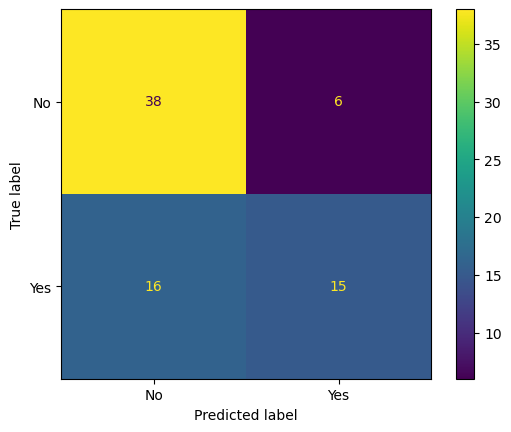

In [130]:
from sklearn.metrics import ConfusionMatrixDisplay
compared_categories = ['serum_creatinine', 'serum_sodium']

heart_disease_preprocessor = make_column_transformer(
     (StandardScaler(), compared_categories),
     remainder= 'passthrough',
     verbose_feature_names_out=False,
)

heart_disease_fit = make_pipeline(heart_disease_preprocessor, KNeighborsClassifier(n_neighbors = 7))
heart_disease_fit = heart_disease_fit.fit(
    heart_disease_train[compared_categories], 
    heart_disease_train["death_event"]
)

confusion_matrix = ConfusionMatrixDisplay.from_estimator(
    heart_disease_fit, 
    heart_disease_test_predictions[compared_categories], 
    heart_disease_test_predictions["death_event"]
)

In [131]:
accuracy = (38 + 15)/(38 + 6 + 16 + 15)
precision = (15)/(16 + 15)
recall = (15)/(15 + 6)
print("Accuracy:", accuracy, "Precision:", precision, "Recall:", recall)

Accuracy: 0.7066666666666667 Precision: 0.4838709677419355 Recall: 0.7142857142857143


From the confusion matrix, we can see that the accuracy is 70%, the precision is 48%, and the recall is 71%. This means that if our classifier predicts best_params = accuracies_grid.loc[accuracies_grid['mean_test_score'].idxmax()]
print("Best Hyperparameters:", best_params)a death event, we can be 71% sure that this death event is going to be a death event.

### Discussion

In our study, we found that serum creatinine and serum sodium together form the most effective pair for predicting mortality in heart failure patients. This combination surpasses others in terms of predictive accuracy, outperforming pairs involving creatinine phosphokinase, ejection fraction, and platelets. We found that setting K-nearest neighbours to 7 generated a mean test score of 0.74, after we fine-tuned our model's hyperparameters with a choice of 5 folds for cross-validation on the training set. The K-nearest neighbours is performed resonablely well and is not severely overfitting or underfitting as the training accuracy (0.78) is higher than both the cross-validated (0.74) and test accuracies (0.70), but not excessively so. This suggests that the model is not heavily overfitting to the training data. The cross-validated accuracy provides a reasonable estimate of the model's performance on new data. The test accuracy is consistent with the cross-validated accuracy, which is a positive sign that the model generalizes well to unseen data. 

Using the confusion matrix, the results show that serum sodium and serum creatinine have a 70% accuracy rate in predicting death events, a 48% precision rate, and a 71% recall rate. The outcome supports our hypothesis that individuals with heart failure may have their death event predicted using specific quantitative variables from the dataset. This is consistent with our initial expectation that machine learning effectively leverages the established ability of electronic health records to recognize patterns and predict patient outcomes, which is helpful to healthcare professionals in identifying key health indicators (Davide Chicco & Giuseppe Jurman, 2020).

The implications of these results are significant for clinical practice. As examined, serum creatinine and ejection fraction are reliable indicators of survival rate of patients in heart failure cases. This implies that clinicians can prioritize these measurements in their initial assessments towards the patients. This approach could streamline the diagnostic process, reduce costs by minimizing unnecessary tests, and enhance patient care. Moreover, identifying patients at high risk of mortality based on these parameters allows healthcare professionals to allocate resources and treatments more effectively. An important question arising from our study asks how does the variability of serum creatinine and ejection fraction levels over time impact the predictive accuracy of mortality in heart failure patients.


## Reference

Chicco, D., & Jurman, G. (2020). Machine learning can predict survival of patients with heart 
failure from serum creatinine and ejection fraction alone. &nbsp;&nbsp;&nbsp;&nbsp;*BMC Medical Informatics and 
Decision Making, 20.*

Sud, M., Tangri, N., Pintilie, M., Levey, A. S., & Naimark, D. M. (2015). ESRD and death after heart failure in CKD. *Journal of the American Society of &nbsp;&nbsp;&nbsp;&nbsp;Nephrology: JASN, 26*(3), 715–722. https://doi.org/10.1681/ASN.2014030253

Lassnigg, A., Schmidlin, D., Mouhieddine, M., Bachmann, L. M., Druml, W., Bauer, P., & Hiesmayr, M. (2004). Minimal changes of serum &nbsp;&nbsp;&nbsp;&nbsp;creatinine predict prognosis in patients after cardiothoracic surgery: A prospective cohort study. *Journal of the American Society of Nephrology, &nbsp;&nbsp;&nbsp;&nbsp;15*(6), 1597-1605. https://doi.org/10.1097/01.ASN.0000130340.93930.DD

Bozkurt, B. (2021). Universal definition and classification of heart failure: a report of the Heart Failure Society of America, Heart Failure Association of &nbsp;&nbsp;&nbsp;&nbsp;the European Society of Cardiology, Japanese Heart Failure Society and Writing Committee of the Universal Definition of Heart Failure Endorsed by &nbsp;&nbsp;&nbsp;&nbsp;the Canadian Heart Failure Society, Heart Failure Association of India, Cardiac Society of Australia and New Zealand, and Chinese Heart Failure &nbsp;&nbsp;&nbsp;&nbsp;Association. *European Journal of Heart Failure, 23*(3), 352-380. 10.1002/ejhf.2115

Lee, D. S., Gona, P., Albano, I., Larson, M. G., Benjamin, E. J., Levy, D., Kannel, W. B. & Vasan, R. S. (2011). A Systematic Assessment of Causes of Death &nbsp;&nbsp;&nbsp;&nbsp;After Heart Failure Onset in the Community. *Circulation: Heart Failure, 4*(1), 36-43. doi: 10.1161/CIRCHEARTFAILURE.110.957480.